# Multi terrain probabistic sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Legend:
White -> FLAT<br>
Light grey-> HILLY<br>
Dark grey->FOREST<br>
Black-> BLOCK


In [1]:
# %run a_star_2.ipynb
%run a_star.ipynb
%run agent_9.ipynb
import numpy as np
import random
from matplotlib import cm

# Code for Agent 6 goes here

In [2]:
def display2(matrix):
    """
    This function is used to display maze with traversed path(highlighted)
    trajectory_path: path traversed by the agent so far
    matrix: maze of the problem
    """
    temp = matrix.copy()
    colormap = cm.get_cmap("Greys")
    plt.imshow(temp, cmap=colormap)
    plt.show()

In [3]:
def run_agent_6(agent6, maze):
#     print("Agent6 started.\nMaze Size: ",maze_size," Source: ",maze.source," Target: ",maze.target)
    source = maze.source
    target = maze.target
    terrain_matrix = maze.terrain_matrix
    full_grid_world_matrix = maze.full_grid_world_matrix
    agent_gridworld = agent6.agent_gridworld
    valid = []
    
    if source == target:
        target_reached = True
        print("found goal")
        return
    else:
        target_reached = False

    while not target_reached:
        initialize(maze_size,0.3)
        current_target = agent6.getMaxProbabilityCell(source)
        path = astar(source,current_target, agent6.agent_gridworld_0_1)[0]
        if(len(path)==0):
            agent6.agent_gridworld_0_1[current_target[0],current_target[1]] = 1
            agent6.update_beliefs_when_xy_blocked(current_target[0], current_target[1], maze_size)
            agent6.agent_gridworld.itemset(current_target,3)
            maze.full_grid_world_matrix[current_target[0],current_target[1]] =1
            maze.terrain_matrix[current_target[0],current_target[1]] = 3
            print("There is no path to the target, try another grid")
            break

        for i in range(len(path)):
            node = path[i]
            if full_grid_world_matrix.item(node) == 0:
                terrain_type = terrain_matrix.item(node)
                agent6.agent_gridworld.itemset(node, terrain_type)
                if i == len(path)-1:
                    if(agent6.examine(node, terrain_type, maze)):
                        print("found goal")
                        target_reached = True
                        break
                    else:
                        #update probabiities when failed to be found and terrain type=terrain_matrix.item(node)
                        current_target, type1, type2 = maze.target_moves(maze_size)
                        print("\n\n\n")
                        source = node
                        agent6.update_belief(maze, type1, type2)
                        agent6.update_certainties(maze)
                        source = path[i]
                        break
            elif full_grid_world_matrix.item(node) == 1:
                agent6.agent_gridworld_0_1[node[0],node[1]] = 1
                current_target, type1, type2 = maze.target_moves(maze_size)
                print('node', node, ' is blocked and current_target is ', current_target)
                print("\n\n\n")
                agent6.update_beliefs_when_xy_blocked(node[0], node[1], maze_size)
#                 agent6.update_belief(maze, type1, type2)
                agent6.update_certainties(maze)
                agent6.agent_gridworld.itemset(node,3)
                source = path[i-1]
                break

#         current_target = source


# Main function

Maze size: 10 
Source:  (9, 0) 
Target: (0, 6) 
maze:


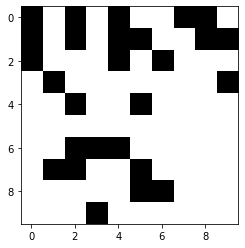

The next target to be visited is (8, 0)
Actual Target moved from  blocked  to  flat
new_target to visit is (7, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 5)
Actual Target moved from  flat  to  flat
new_target to visit is (6, 1)
node (9, 3)  is blocked and current_target is  (6, 1)




The next target to be visited is (8, 2)
Actual Target moved from  blocked  to  flat
new_target to visit is (8, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 2)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (7, 6)




The next target to be visited is (8, 3)
Actual Target moved from  block

Actual Target moved from  blocked  to  flat
new_target to visit is (3, 6)
Actual Target moved from  blocked  to  flat
new_target to visit is (8, 8)
Actual Target moved from  blocked  to  flat
new_target to visit is (9, 4)
Actual Target moved from  blocked  to  flat
new_target to visit is (4, 0)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 4)




The next target to be visited is (4, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 4)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 1)
Actual Target moved from  blocked  to  flat
new_target to visit is (9, 8)
Actual Target moved from  blocked  to  flat
new_target to visit is (6, 6)
Actual Target moved from  blocked  to  flat
new_target to visit is (9, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 4)
Actual Target moved from  blocked  to  flat
new_target to visit is (7, 8)


The next target to be visited is (1, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 7)
node (1, 8)  is blocked and current_target is  (2, 7)




The next target to be visited is (2, 9)
Actual Target moved from  blocked  to  flat
new_target to visit is (6, 1)
Actual Target moved from  blocked  to  flat
new_target to visit is (4, 4)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 3)
Actual Target moved from  blocked  to  flat
new_target to visit is (9, 4)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 5)
Actual Target moved from  blocked  to  flat
new_target to visit is (7, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 8)
node (8, 6)  is blocked and current_target is  (4, 8)




Th

The next target to be visited is (3, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 2)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 6)
Actual Target moved from  blocked  to  flat
new_target to visit is (2, 1)
Actual Target moved from  blocked  to  flat
new_target to visit is (8, 1)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (6, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (0, 5)




The next target to be visited is (3, 8)
Actual Target moved from  blocked  to  flat
new_target to visit is (2, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (1, 1)




The next target to be visited is (2, 8)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 5)
Actual Target moved from  blocked  to  flat
new_target to visit is (8, 2)
Actual Target moved from  blocked  to  flat
new_target to visit is (2,

The next target to be visited is (5, 9)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 1)




The next target to be visited is (4, 9)
Actual Target moved from  blocked  to  flat
new_target to visit is (6, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 9)




The next target to be visited is (4, 8)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 7)
Actual Targ

The next target to be visited is (9, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 9)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 9)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 9)
Actual Target moved from  flat  to  flat
new_target to visit is (7, 9)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 9)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 2)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 7)




The next target to be visited 

The next target to be visited is (3, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 1)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (6, 9)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 9)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 0)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (0, 5)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 5)
Actual Target moved from  flat  to

The next target to be visited is (5, 4)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 1)
Actual Target moved from  flat  to  flat
new_target to visit is (6, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (6, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 8)




The next target to be visited is (4, 4)
Actual Target moved from  blocked  to  flat
new_target to visit is (7, 9)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 2)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (7, 8)
Actual Target moved from  flat  to  flat
new_target to vis

new_target to visit is (9, 1)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 5)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (7, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 0)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 1)
Actual Target moved from  flat  to  flat
new_target to visit is (7, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (7, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 3)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 5)
Actual Target moved from  flat  to  flat
new_target to visit is (7, 9)
Actual Target moved from  flat  to  flat
new_ta

new_target to visit is (6, 8)




The next target to be visited is (3, 8)
Actual Target moved from  blocked  to  flat
new_target to visit is (4, 6)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 6)
Actual Target moved from  blocked  to  flat
new_target to visit is (8, 1)
Actual Target moved from  blocked  to  flat
new_target to visit is (4, 1)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 1)




The next target to be visited is (2, 8)
Actual Target moved from  blocked  to  flat
new_target to visit is (7, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (6, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 2)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (2, 5)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 4)
Actual Target m

The next target to be visited is (3, 3)
Actual Target moved from  blocked  to  flat
new_target to visit is (7, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (6, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (5, 5)
Actual Target moved from  blocked  to  flat
new_target to visit is (4, 7)
Actual Target moved from  blocked  to  flat
new_target to visit is (9, 1)
Actual Target moved from  flat  to  flat
new_target to visit is (4, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 8)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 7)




The next target to be visited is (2, 3)
Actual Target moved from  blocked  to  flat
new_target to visit is (4, 0)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 6)
Actual Target moved from  blocked  to  flat
new_target to visit is (4, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 7)
Actual Target moved from  flat  to  flat

The next target to be visited is (2, 2)
Actual Target moved from  blocked  to  flat
new_target to visit is (4, 7)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 5)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 2)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 8)




The next target to be visited is (2, 1)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 1)
Actual Target moved from  flat  to  flat
new_target to visit is (9, 4)
Actual Target moved from  flat  to  flat
new_target to visit is (5, 5)
Actual Target moved from  flat  to  flat
new_target to visit is (3, 6)
Actual Target moved from  flat  to  flat
new_target to visit is (8, 3)




The next target to be visited is (1, 1)
Actual Target moved from  blocked  to  flat
new_target to visit is (9, 2)
Actual Target moved from  blocked  to  flat
new_target to visit is (3, 5)
Actual T

In [4]:
if __name__ == "__main__":

    #Initialize Maze
    maze_size = 10
    maze = gridworld(maze_size)

    # set source and target
    initialize(maze_size,0.3)
#     print(maze.source,maze.target, maze.full_grid_world_matrix)
    path = astar(maze.source, maze.target, maze.full_grid_world_matrix)
    while(len(path)==0):
        print("finding valid source and target")
        maze.source, maze.target = maze.set_valid_source_target(maze_size)
        initialize(maze_size,0.3)
        path = astar(maze.source, maze.target, maze.full_grid_world_matrix)

    # Initialize Agent 6
    agent6 = agent_6(maze_size)

    #Print all details
    print("Maze size:",maze_size,"\nSource: ",maze.source,"\nTarget:",maze.target,"\nmaze:")
    display2(maze.terrain_matrix)
    #runnning Agent 6 on maze
    run_agent_6(agent6, maze)

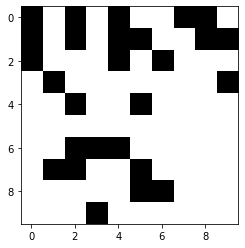

In [5]:
display2(maze.full_grid_world_matrix)